### Getting Spotify Data From Kaggle

In [ ]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsPlots")

    Updating registry at `C:\Users\User\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`


## Understanding the Data

In [32]:

using CSV
using DataFrames

In [33]:
# Load the CSV file into a DataFrame
df = CSV.read("spotify_songs.csv", DataFrame)
df

Row,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,String31,String,String,Int64,String31,String,Date,String,String31,String7,String31,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754
2,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600
3,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-5,0.11,0.613,124.008,176616
4,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-6,0.204,0.277,121.956,169093
5,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052
6,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0.0,0.143,0.585,124.982,163049
7,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0.0,0.176,0.152,112.648,187675
8,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619
9,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187


## Preprocess Data

In [48]:
using Chain
spotify = @chain df begin
    dropmissing                      # Remove rows with missing values
    transform(:track_popularity => ByRow(x -> x >= 50) => :is_popular)  # Add binary 'is_popular'
    transform(:track_album_release_date => ByRow(year) => :year)  # Add binary 'is_popular'
    select(Not(:track_name, :track_artist, :mode, :track_album_name, :track_album_id, :key, :track_album_release_date))  # Select relevant columns
end

Row,track_id,track_popularity,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular,year
,String31,Int64,String,String31,String7,String31,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Bool,Int64
1,6f807x0ima9a1j3VPbc7VN,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,true,2019
2,0r7CVbZTWZgbTCYdfa2P31,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,true,2019
3,1z1Hg7Vb0AhHDiEmnDE79l,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,2.33e-5,0.11,0.613,124.008,176616,true,2019
4,75FpbthrwQmzHlBJLuGdC7,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,-3.778,0.102,0.0287,9.43e-6,0.204,0.277,121.956,169093,true,2019
5,1e8PAfcKUYoKkxPhrHqw4x,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,-4.672,0.0359,0.0803,0.0,0.0833,0.725,123.976,189052,true,2019
6,7fvUMiyapMsRRxr07cU8Ef,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,-5.385,0.127,0.0799,0.0,0.143,0.585,124.982,163049,true,2019
7,2OAylPUDDfwRGfe0lYqlCQ,62,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,-4.788,0.0623,0.187,0.0,0.176,0.152,112.648,187675,true,2019
8,6b1RNvAcJjQH73eZO4BLAB,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,-2.419,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619,true,2019
9,7bF6tCO3gFb8INrEDcjNT5,68,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,-3.562,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187,true,2019


## Exploratory Data Analysis (Visualizing)

### Stat Summary

In [22]:
describe(spotify, :mean, :std, :min, :median, :max)

Row,variable,mean,std,min,median,max
,Symbol,Union…,Union…,Any,Any,Any
1,track_id,,,0017A6SJgTbfQVU2EtsPNo,,7zzZmpw8L66ZPjH1M6qmOs
2,track_name,,,"""I TRIED FOR YEARS... NOBODY LISTENED""",,하드캐리 Hard Carry
3,track_artist,,,!!!,,香取慎吾
4,track_popularity,42.4771,24.9841,0,45.0,100
5,track_album_id,,,000YOrgQoB5IiiH95Yb8vY,,7zygyMUltFYOvHoT3NOTsj
6,track_album_name,,,!,,화양연화 The Most Beautiful Moment In Life: Young Forever
7,track_album_release_date,,,1957-01-01,2016-08-26,2020-01-29
8,playlist_name,,,"""Permanent Wave""",,🤩🤪Post Teen Pop🤪🤩
9,playlist_id,,,0275i1VNfBnsNbPl0QIBpG,,7xWuNevFBmwnFEg6wzdCc7


### Plots

### Correlation Plot

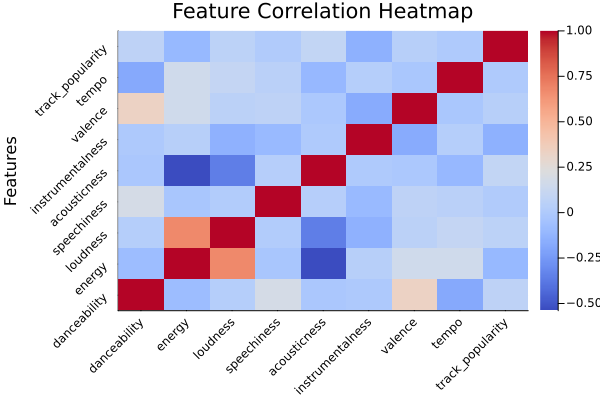

In [30]:
using DataFrames, StatsPlots, Statistics

# Example: Calculate the correlation matrix for numerical features
features = [:danceability, :energy, :loudness, :speechiness, :acousticness, :instrumentalness, :valence, :tempo, :track_popularity]
# Convert selected features to a matrix
data_matrix = Matrix(df[:, features])

# Compute correlation matrix
corr_matrix = cor(data_matrix)

# Convert Symbols to Strings for plotting
feature_labels = string.(features)


# Plot heatmap
heatmap(
    feature_labels, feature_labels, corr_matrix,
    title = "Feature Correlation Heatmap",
    xlabel = "Features",
    ylabel = "Features",
    rotation = 45,
    color = :coolwarm
)

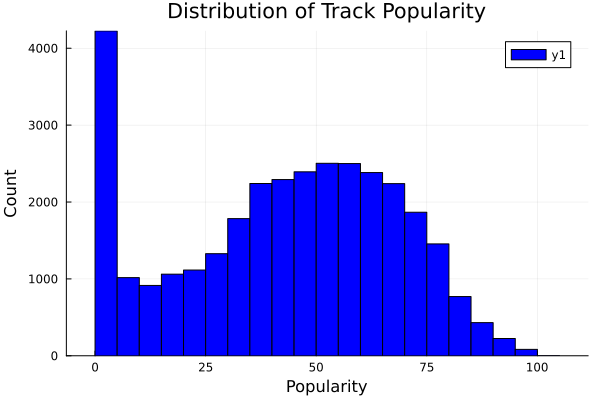

In [49]:
@df spotify histogram(
    :track_popularity,
    bins = 20,
    title = "Distribution of Track Popularity",
    xlabel = "Popularity",
    ylabel = "Count",
    color = :blue
)


### Popularity over the Years

In [47]:
println(names(df))  # Check column names in the DataFrame

["track_id", "track_name", "track_artist", "track_popularity", "track_album_id", "track_album_name", "track_album_release_date", "playlist_name", "playlist_id", "playlist_genre", "playlist_subgenre", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]


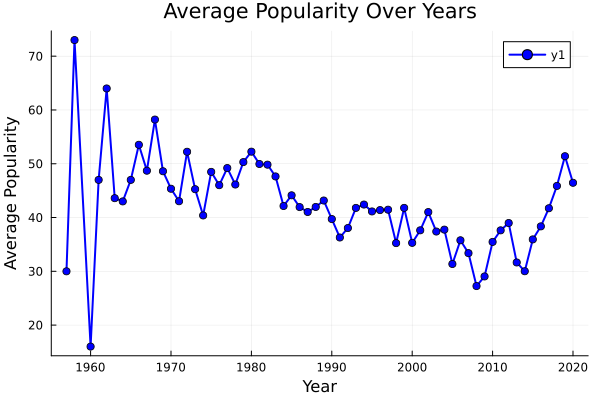

In [54]:

using DataFrames, Statistics, StatsPlots
yearly_popularity = combine(groupby(spotify, :year), :track_popularity => mean => :avg_popularity)
sort!(yearly_popularity, :year)
@df yearly_popularity plot(
    :year, :avg_popularity,
    title = "Average Popularity Over Years",
    xlabel = "Year",
    ylabel = "Average Popularity",
    marker = :circle,
    linewidth = 2,
    color = :blue
)


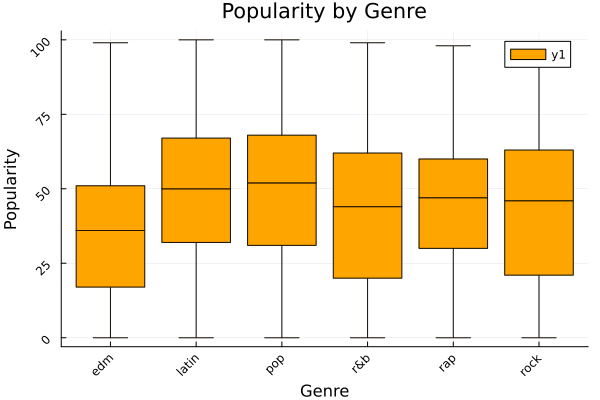

In [38]:
@df df boxplot(
    :playlist_genre, :track_popularity,
    title = "Popularity by Genre",
    xlabel = "Genre",
    ylabel = "Popularity",
    rotation = 45,  # Rotate x-axis labels
    color = :orange
)

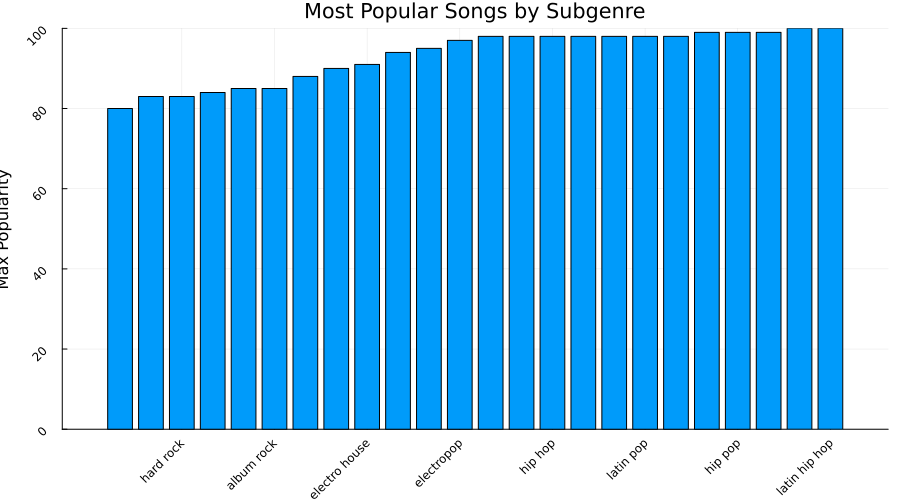

In [23]:
using Plots
most_popular_by_genre = @chain df begin
    groupby(:playlist_subgenre)  # Group by subgenre
    combine(:track_popularity => maximum => :max_popularity)  # Find max popularity for each group
    sort(:max_popularity, rev=false)  # Sort by popularity in descending order
end

x = most_popular_by_genre.playlist_subgenre  # Subgenre names
y = most_popular_by_genre.max_popularity  # Maximum popularity values


plot(x, y, seriestype = :bar, 
        xlabel = "Subgenre", ylabel = "Max Popularity", 
        title = "Most Popular Songs by Subgenre", 
        xticks=:auto, legend=false, rotation=45, size=(900, 500))


## 

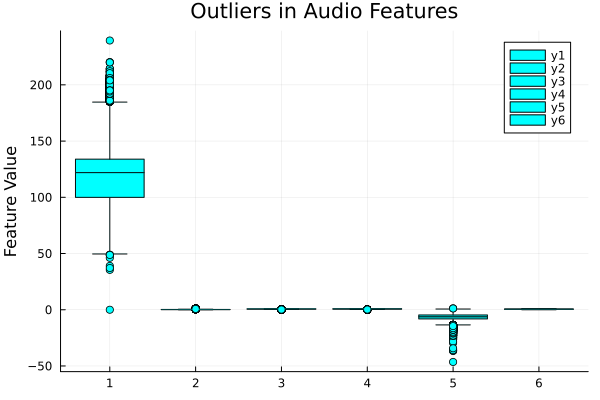

In [56]:
@df spotify boxplot(
    [:tempo, :liveness, :danceability, :energy, :loudness, :valence],
    title = "Outliers in Audio Features",
    ylabel = "Feature Value",
    color = :cyan
)

## Modeling

### Prepping the Data

In [62]:
import Pkg; Pkg.add("GLM"); Pkg.add("MLBase")


   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
   Installed MLBase ─ v0.9.2
    Updating `C:\Users\User\.julia\environments\v1.10\Project.toml`
  [f0e99cf1] + MLBase v0.9.2
    Updating `C:\Users\User\.julia\environments\v1.10\Manifest.toml`
  [f0e99cf1] + MLBase v0.9.2
Precompiling project...
  ✓ MLBase
  1 dependency successfully precompiled in 4 seconds. 361 already precompiled.


In [63]:
using DataFrames, GLM, StatsPlots, Random, MLBase

Random.seed!(123)
train_indices = sample(1:nrow(spotify), round(Int, 0.8 * nrow(spotify)), replace=false)
train_set = spotify[train_indices, :]
test_set = spotify[Not(train_indices), :]

Row,track_id,track_popularity,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_popular,year
,String31,Int64,String,String31,String7,String31,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Bool,Int64
1,6f807x0ima9a1j3VPbc7VN,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,-2.634,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,true,2019
2,6b1RNvAcJjQH73eZO4BLAB,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,-2.419,0.0434,0.0335,4.83e-6,0.111,0.367,127.936,207619,true,2019
3,7bF6tCO3gFb8INrEDcjNT5,68,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,-3.562,0.0565,0.0249,3.97e-6,0.637,0.366,127.015,193187,true,2019
4,55nMnifaQWKe3f9cbwOXwx,63,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.69,0.78,-4.446,0.0594,0.00733,0.00183,0.0729,0.238,126.07,255238,true,2019
5,3TjLsDgL0bTbSQIF6M5Ki8,65,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.678,0.747,-5.289,0.165,0.0395,0.0,0.174,0.516,120.002,189375,true,2018
6,0GfS3y8Jd7SHWd9R51s7Fo,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.746,0.557,-6.722,0.0542,0.103,0.0036,0.138,0.324,111.961,159404,true,2019
7,4sqABRRGU7CzcHXCyxUzFw,58,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.62,0.889,-3.785,0.0352,0.0163,1.86e-5,0.395,0.422,110.018,205093,true,2019
8,4sLtguRBis05qfsBgJ1IdN,55,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.831,-5.029,0.115,0.0823,7.36e-5,0.0757,0.894,128.024,185273,true,2019
9,6oJ6le65B3SEqPwMRNXWjY,87,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.693,0.678,-7.159,0.0324,0.0154,6.05e-6,0.101,0.404,103.952,228267,true,2019


### Creating the Logistic Regression Model

In [65]:
# Logistic regression
formula = @formula(is_popular ~ danceability + energy  + loudness+ speechiness + 
                   acousticness + instrumentalness + liveness + valence + tempo + duration_ms)
model = glm(formula, train_set, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

is_popular ~ 1 + danceability + energy + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)        2.45663     0.162482      15.12    <1e-50   2.13817       2.77509
danceability       0.0428067   0.10109        0.42    0.6720  -0.155327      0.24094
energy            -2.29923     0.117386     -19.59    <1e-84  -2.5293       -2.06916
loudness           0.122601    0.00644548    19.02    <1e-79   0.109968      0.135234
spee

liveness and danceability not statistically signifcant 

Significant Predictors:

Features like energy, loudness, speechiness, instrumentalness, and valence strongly influence popularity.
Positive coefficients like valence and loudness suggest these features increase the likelihood of popularity.
Negative coefficients like energy and instrumentalness suggest these features decrease the likelihood.
Practical Implications:

To make a song more likely to be popular:
Increase valence (happiness) and loudness.
Avoid too much energy, instrumentalness, or speechiness.
Feature Ranking:

Based on the magnitude of the coefficients, instrumentalness, energy, and duration_ms have the strongest impact on popularity.

In [79]:
# Feature importance
coefs = coef(model)
features_with_intercept = vcat(["Intercept"], features)
coef_df = DataFrame(feature=features_with_intercept, coefficient=coefs)

DimensionMismatch: DimensionMismatch: column :feature has length 10 and column :coefficient has length 11

In [73]:

# Prepare smaller model
formula = @formula(is_popular ~ energy + loudness + speechiness + acousticness + 
                   instrumentalness + valence + tempo + duration_ms)

# Fit the new model
smaller_model = glm(formula, train_set, Binomial(), LogitLink())



StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

is_popular ~ 1 + energy + loudness + speechiness + acousticness + instrumentalness + valence + tempo + duration_ms

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                        Coef.   Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)        2.49121     0.131826      18.90    <1e-78   2.23284      2.74959
energy            -2.33888     0.113364     -20.63    <1e-93  -2.56107     -2.11669
loudness           0.123549    0.00636875    19.40    <1e-83   0.111066     0.136031
speechiness       -0.558978    0.126798      -4.41    <1e-04  -0.807498    -0.310459
acousticness       0.179766    0.069

## Eval the mod

In [85]:
# Evaluate
probabilities = predict(model, test_set)
predictions = probabilities .>= 0.5
accuracy = mean(predictions .== test_set.is_popular)
println("Model Accuracy: ", accuracy)

Model Accuracy: 0.596619460941069


In [75]:
probabilities_small = predict(smaller_model, test_set)
predictions_small = probabilities_small .>= 0.5
accuracy_small = mean(predictions_small .== test_set.is_popular)
println("Smaller Model Accuracy: ", accuracy_small)

Smaller Model Accuracy: 0.5978376732145576


In [87]:
# Filter out missing probabilities
valid_indices = .!ismissing.(probabilities)

# Extract valid true labels and probabilities
true_labels = Int.(test_set.is_popular[valid_indices])  # Convert Bool to Int
predicted_scores = probabilities[valid_indices]

# Compute the ROC curve
tpr, fpr, thresholds = roc(true_labels, predicted_scores)

# Plot the ROC curve
using StatsPlots
plot(
    fpr, tpr,
    title = "ROC Curve",
    xlabel = "False Positive Rate",
    ylabel = "True Positive Rate",
    linewidth = 2,
    color = :red
)

# Calculate and display AUC
auc_value = auc(fpr, tpr)
println("AUC: ", auc_value)


MethodError: MethodError: no method matching roc(::Vector{Int64}, ::Vector{Union{Missing, Float64}})

Closest candidates are:
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Base.Order.Ordering)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:301
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Integer, !Matched::Base.Order.Ordering)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:296
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Integer)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:299
  ...


In [82]:
# ROC Curve
using MLBase
tpr, fpr, thresholds = roc(test_set.is_popular, probabilities)
    fpr, tpr,
    title = "ROC Curve",
    xlabel = "False Positive Rate",
    ylabel = "True Positive Rate",
    linewidth = 2,
    color = :red
)

MethodError: MethodError: no method matching roc(::Vector{Bool}, ::Vector{Union{Missing, Float64}})

Closest candidates are:
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Base.Order.Ordering)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:301
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Integer, !Matched::Base.Order.Ordering)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:296
  roc(::AbstractVector{<:Integer}, !Matched::AbstractVector{<:Real}, !Matched::Integer)
   @ MLBase C:\Users\User\.julia\packages\MLBase\9EP41\src\perfeval.jl:299
  ...
